# Hyperparameter Optimierung mit Talos

## Vorgehensweise

#### 1. Datenvorbereitung  
    1.1 Daten laden  
    1.2 Aufteilung in Trainings- und Testdaten  
    1.3 Resampling-Methoden  
    1.4 Skalierung der Eingabewerte  

#### 2. Aufbau der Netzstruktur und der Parametrisierung  
    2.1 Hyperparameter-Dictionary erstellen  
    2.2 Netzstruktur erstellen  
    2.3 Parametervariablen einbauen
      
#### 3. Durchführung des Scans  
    3.1 Zielvariable vorbereiten  
    3.2 Scan durchführen  
    
#### 4. Auswertung der Ergebnisse  
    4.1 Überblick über die Ergebnisse verschaffen  
    4.2 Visualisierungen nutzen  
    4.3 Bestes Modell speichern
    4.4 Modell manuell valuieren


## 1. Datenvorbereitung

### 1.1 Daten laden

In [1]:
import numpy as np
import pandas as pd
# gesamtes Feature-Set
data_vec = pd.read_pickle("C:/Users/astapper/Documents/KI_MeetUp/Daten/gesamtes_feature_set")

# reduziertes Feature-Set
#data_vec = pd.read_pickle("C:/Users/astapper/Documents/KI_MeetUp/Daten/reduziertes_feature_set")

#data_vec = pd.read_csv(".\\Daten\\training_set.csv", sep=';', encoding="ISO-8859-1")

In [2]:
import talos as ta
%matplotlib inline

Using TensorFlow backend.


### 1.2 Aufteilung in Trainings- und Testset (70%/30%)

In [3]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_vec, test_size=0.3, random_state=1234)


print("Daten im Trainingsset: " + str(len(train_set)))
print("Daten im Testset: " + str(len(test_set)))


Daten im Trainingsset: 4146
Daten im Testset: 1777


In [4]:
x_train = train_set.drop(columns = ["exceed_limit_40"])
y_train = train_set["exceed_limit_40"].astype('category', ordered = True)

x_test = test_set.drop(columns = ["exceed_limit_40"])
y_test = test_set["exceed_limit_40"].astype('category', ordered = True)

C:\Users\astapper\AppData\Local\Continuum\anaconda3\envs\hyper_test\lib\site-packages\IPython\core\interactiveshell.py:3296: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


### 1.3 Resampling 

#### Oversampling via SMOTE

In [5]:
from imblearn.over_sampling import SMOTE

C:\Users\astapper\AppData\Local\Continuum\anaconda3\envs\hyper_test\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [6]:
# original x_train und y_train speichern
x_train_alt = x_train
y_train_alt = y_train

In [7]:
sm = SMOTE(random_state=123)
x_train, y_train = sm.fit_sample(x_train_alt, y_train_alt)

In [8]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_alt==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_alt==0)))

print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 249
Before OverSampling, counts of label '0': 3897 

After OverSampling, the shape of train_X: (7794, 44)
After OverSampling, the shape of train_y: (7794,) 

After OverSampling, counts of label '1': 3897
After OverSampling, counts of label '0': 3897


### 1.4 Skalierung der Eingabewerte

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

scaler = MinMaxScaler()
#scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

## 2. Aufbau der Netzstruktur und der Parametrisierung

### 2.1 HyperParaDic erstellen

In [10]:
from keras.optimizers import Adam, Nadam
from keras.layers import ReLU, LeakyReLU
from keras.losses import binary_crossentropy, logcosh

p = {
    'optimizer': ['Adam', 'Nadam'],
    'activation': ['NN.add(ReLU())', 'NN.add(LeakyReLU(0.3))'],
    'loss': ['binary_crossentropy'],
    'epochs': [100],
    'batch_size': [32],
    'dropout': ['NN.add(Dropout(0))', 'NN.add(Dropout(0.1))', 'NN.add(Dropout(0.25))'],

}

### 2.2 + 2.3 Netzstruktur erstellen und Parametervariablen einbauen

In [11]:
import tensorflow as tf
import keras
#import keras_metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU, ReLU, AlphaDropout
from keras import regularizers

def nn_model(x_train, y_train, x_val, y_val, params):

    ## Rohform des Modells
    
    NN = Sequential()


    
    
    ## Eingabeschicht 
    NN.add(Dense(64, input_dim=44, kernel_initializer="random_uniform"))
    params['activation']
    params['dropout']
    #NN.add(BatchNormalization())

    
    ## Zwischenschichten
    NN.add(Dense(128,kernel_initializer="normal"))
    params['activation']
    params['dropout']
    #NN.add(BatchNormalization())

    NN.add(Dense(256,kernel_initializer="normal"))
    params['activation']
    params['dropout']
    #NN.add(BatchNormalization())

    NN.add(Dense(128,kernel_initializer="normal"))
    params['activation']
    params['dropout']
    #NN.add(BatchNormalization())

    NN.add(Dense(64,kernel_initializer="normal"))
    params['activation']
    params['dropout']
    #NN.add(BatchNormalization())

    NN.add(Dense(32,kernel_initializer="normal"))
    params['activation']
    params['dropout']
    #NN.add(BatchNormalization())

    NN.add(Dense(16,kernel_initializer="normal"))
    params['activation']

    
    ## Ausgabeschicht
    NN.add(Dense(1,kernel_initializer="random_uniform", activation="sigmoid"))

    
    ## Modell bauen
    NN.compile(loss= params['loss'],
           optimizer= params['optimizer'], 
           metrics= ['accuracy']) 
    
    ## 
    out = NN.fit(x_train, y_train,
                    batch_size=params['batch_size'],
                    epochs=params['epochs'],
                    verbose=0,
                    validation_data=[x_val, y_val])
    
    return out, NN


## 3. Scan durchführen

### 3.1 Zielvariable vorbereiten

In [12]:
y_train_rav = y_train.ravel()

In [13]:
y_train_rav

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### 3.2 Scan durchführen

In [14]:
h = ta.Scan(x= x_train_scaled, y= y_train_rav, model=nn_model, params=p, val_split=0.2, print_params=True)

  0%|          | 0/12 [00:00<?, ?it/s]

{'activation': 'NN.add(ReLU())', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


  8%|▊         | 1/12 [00:53<09:49, 53.60s/it]

{'activation': 'NN.add(ReLU())', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Nadam'}


 17%|█▋        | 2/12 [01:49<09:02, 54.28s/it]

{'activation': 'NN.add(ReLU())', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.1))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}


 25%|██▌       | 3/12 [02:44<08:09, 54.37s/it]

{'activation': 'NN.add(ReLU())', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.1))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Nadam'}


 33%|███▎      | 4/12 [03:43<07:26, 55.75s/it]

{'activation': 'NN.add(ReLU())', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.25))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}


 42%|████▏     | 5/12 [04:38<06:30, 55.80s/it]

{'activation': 'NN.add(ReLU())', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.25))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Nadam'}


 50%|█████     | 6/12 [05:46<05:55, 59.22s/it]

{'activation': 'NN.add(LeakyReLU(0.3))', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}


 58%|█████▊    | 7/12 [06:41<04:50, 58.15s/it]

{'activation': 'NN.add(LeakyReLU(0.3))', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Nadam'}


 67%|██████▋   | 8/12 [07:39<03:52, 58.08s/it]

{'activation': 'NN.add(LeakyReLU(0.3))', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.1))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}


 75%|███████▌  | 9/12 [08:32<02:49, 56.54s/it]

{'activation': 'NN.add(LeakyReLU(0.3))', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.1))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Nadam'}


 83%|████████▎ | 10/12 [09:27<01:52, 56.15s/it]

{'activation': 'NN.add(LeakyReLU(0.3))', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.25))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}


 92%|█████████▏| 11/12 [10:21<00:55, 55.46s/it]

{'activation': 'NN.add(LeakyReLU(0.3))', 'batch_size': 32, 'dropout': 'NN.add(Dropout(0.25))', 'epochs': 100, 'loss': 'binary_crossentropy', 'optimizer': 'Nadam'}


100%|██████████| 12/12 [11:19<00:00, 56.00s/it]


## 4. Auswertung der Ergebnisse

### 4.1 Überblick verschaffen

In [15]:
h.data.head(35)

,round_epochs,val_loss,val_acc,loss,acc,activation,batch_size,dropout,epochs,loss,optimizer
0,100,0.337937,0.855677,0.310773,0.872654,NN.add(ReLU()),32,NN.add(Dropout(0)),100,binary_crossentropy,Adam
1,100,0.339980,0.855035,0.312887,0.872815,NN.add(ReLU()),32,NN.add(Dropout(0)),100,binary_crossentropy,Nadam
2,100,0.342031,0.860808,0.309690,0.874419,NN.add(ReLU()),32,NN.add(Dropout(0.1)),100,binary_crossentropy,Adam
3,100,0.345455,0.861450,0.310933,0.872494,NN.add(ReLU()),32,NN.add(Dropout(0.1)),100,binary_crossentropy,Nadam
4,100,0.334922,0.862091,0.312365,0.872173,NN.add(ReLU()),32,NN.add(Dropout(0.25)),100,binary_crossentropy,Adam
5,100,0.335617,0.857601,0.310600,0.874900,NN.add(ReLU()),32,NN.add(Dropout(0.25)),100,binary_crossentropy,Nadam
6,100,0.334499,0.864657,0.310628,0.873456,NN.add(LeakyReLU(0.3)),32,NN.add(Dropout(0)),100,binary_crossentropy,Adam
7,100,0.342201,0.863374,0.312075,0.874098,NN.add(LeakyReLU(0.3)),32,NN.add(Dropout(0)),100,binary_crossentropy,Nadam
8,100,0.336584,0.862091,0.309810,0.872975,NN.add(LeakyReLU(0.3)),32,NN.add(Dropout(0.1)),100,binary_crossentropy,Adam
9,100,0.349241,0.861450,0.311128,0.870569,NN.add(LeakyReLU(0.3)),32,NN.add(Dropout(0.1)),100,binary_crossentropy,Nadam


In [16]:
h.details

experiment_name            052919081156
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            05/29/19/08:23
x_shape                      (7794, 44)
y_shape                         (7794,)
dtype: object

In [17]:
r = ta.Reporting(h)

In [18]:
r.high('val_acc')

0.8646568314550472

In [19]:
r.rounds2high()

6

In [20]:
r.low()

0.8550352791779465

### 4.2 Visualisierungen nutzen

In [21]:
r.correlate()

batch_size   NaN
epochs       NaN
Name: val_acc, dtype: float64

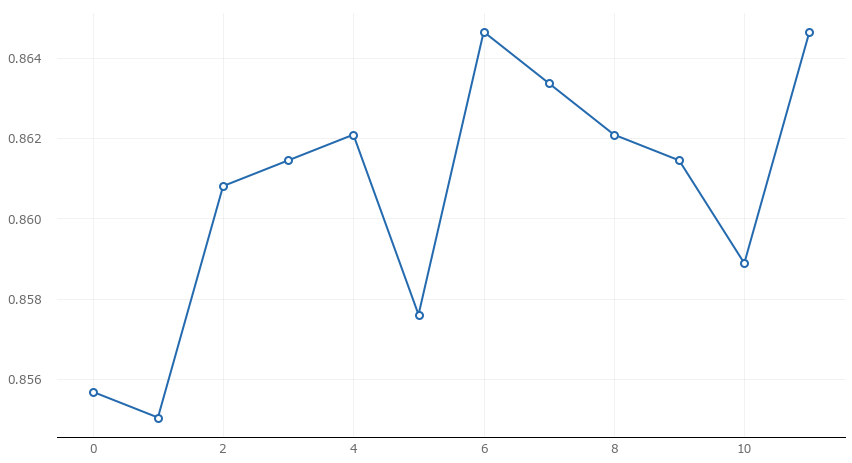

In [22]:
r.plot_line()

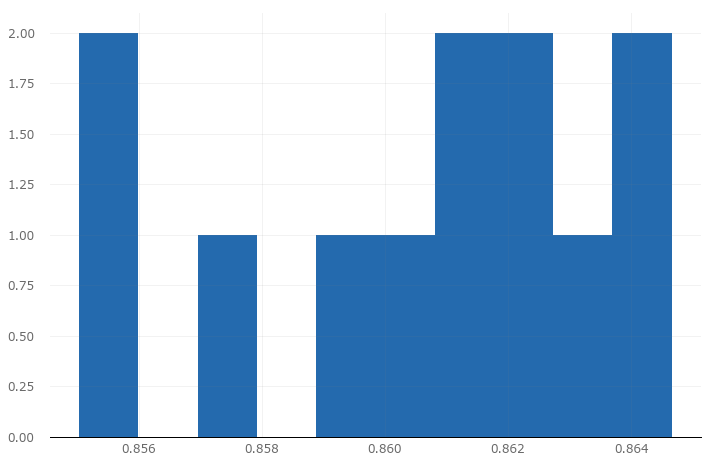

In [23]:
r.plot_hist()

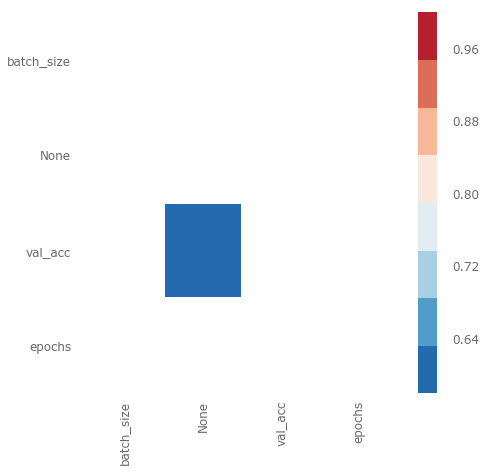

In [24]:
r.plot_corr()

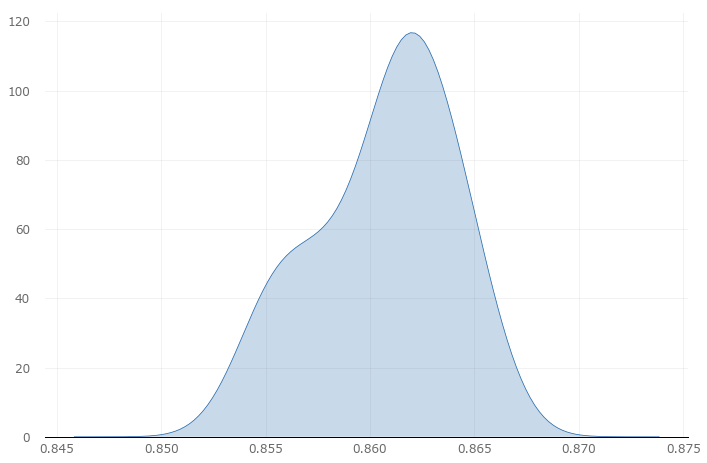

In [25]:
r.plot_kde('val_acc')

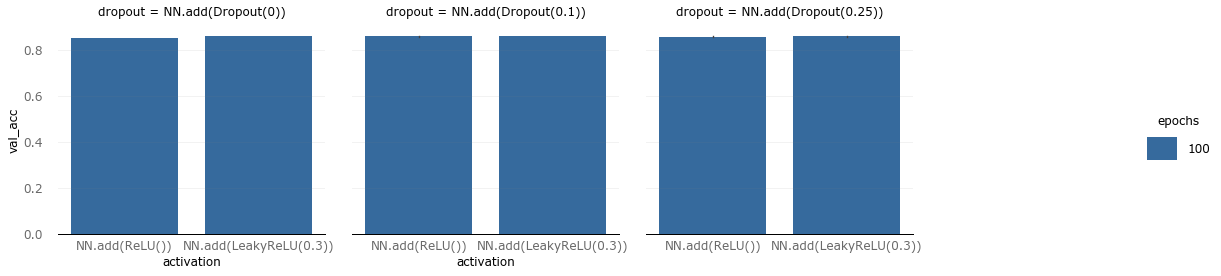

In [28]:
r.plot_bars(x='activation', y='val_acc', hue='epochs', col='dropout')

### 4.3 Nützliche Modelle speichern

#### Modell über Talos evaluieren

In [29]:
from talos import Evaluate

In [30]:
e = Evaluate(h)

In [31]:
y_test = y_test.ravel()

In [32]:
y_test_neu = y_test.reshape((y_test.shape[0],1))

In [33]:
# Evaluiert das beste Modell aus dem Scan
# liefert den F1-Score für 'binary'
e.evaluate(x_test_scaled, y_test_neu, shuffle=True, folds=1, 
           mode='binary', # 'binary', 'multi_class', 'multi_label', or 'regression'
           metric='val_acc' # A column name referring to the metric that was used in the
            # scan_object as a performance metric. This is used for sorting
            # the results to pick for evaluation.
           
          )

[0.4067796610169491]

#### Modell als package aus Modell (.json) und Gewichten (.h5) speichern

In [34]:
from talos import Deploy

In [35]:
Deploy(h, 'test')

Deploy package test have been saved.


Paket extrahieren!

#### Modell aus json laden

In [36]:
from keras.models import model_from_json

In [37]:
json_file = open('C:/Users/astapper/Documents/KI_MeetUp/Treffen/Hyperparameter/test/test_model.json', 'r')

In [38]:
loaded_model_json = json_file.read()
json_file.close()

In [39]:
loaded_model = model_from_json(loaded_model_json)

In [40]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                2880      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
__________

#### Gewichte laden

In [47]:
loaded_model.load_weights('C:/Users/astapper/Documents/KI_MeetUp/Treffen/Hyperparameter/test/test_model.h5')

### 4.4 Modelle manuell evaluieren

#### Testdaten vorhersagen

In [48]:
# Testdaten vorhersagen
y_test_vorhersage = np.round(loaded_model.predict(x_test_scaled).reshape(x_test_scaled.shape[0],))

In [49]:
y_test_vorhersage

array([0., 1., 0., ..., 0., 0., 1.], dtype=float32)

#### Confusion-Matrix

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
y_true = y_test
y_pred = y_test_vorhersage
confmat = confusion_matrix(y_true, y_pred)

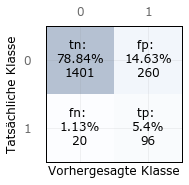

In [52]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        if str(i)+str(j) =='00': ax.text(x=j, y=i, s='tn: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
        elif str(i)+str(j) == '01': ax.text(x=j, y=i, s='fp: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
        elif str(i)+str(j) == '10': ax.text(x=j, y=i, s='fn: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
        else: ax.text(x=j, y=i, s='tp: \n'+str(round((confmat[i,j]/len(y_test)*100),2))+'%\n'+str(confmat[i,j]), va='center', ha='center')
plt.xlabel('Vorhergesagte Klasse')
plt.ylabel('Tatsächliche Klasse')
plt.show()

####  Precision, Recall & F1-Score

In [53]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Genauigkeit / Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_test_vorhersage))

print('Trefferquote / Recall: %3f' %recall_score(y_true=y_test, y_pred=y_test_vorhersage))

print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_test_vorhersage))

Genauigkeit / Precision: 0.270
Trefferquote / Recall: 0.827586
F1: 0.407


#### ROC- Kurve

In [54]:
from sklearn.metrics import roc_curve, auc

In [55]:
y_pred_proba = loaded_model.predict_proba(x_test_scaled)
y_pred_proba

array([[0.00274241],
       [0.6535941 ],
       [0.06327567],
       ...,
       [0.00423869],
       [0.01606089],
       [0.82933587]], dtype=float32)

In [56]:
fpr_proba, tpr_proba, thresholds_proba = roc_curve(y_test, y_pred_proba)
auc_proba = auc(fpr_proba, tpr_proba)

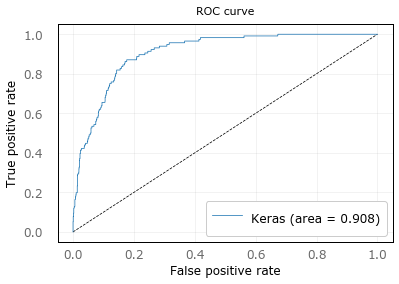

In [57]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_proba, tpr_proba, label='Keras (area = {:.3f})'.format(auc_proba))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()